In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./datas/SMSSpamCollection',delimiter='\t',header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
print(df[df[0]=='ham'][0].count(),':非垃圾短信')
print(df[df[0]=='spam'][0].count(),':垃圾短信')

4825 :非垃圾短信
747 :垃圾短信


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer #自然语言处理
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score #交叉验证

In [5]:
X=df[1].values
y=df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)
tfidf=TfidfVectorizer()

In [6]:
X_train=tfidf.fit_transform(X_train_raw)
X_test=tfidf.transform(X_test_raw)
logr=LogisticRegression()

In [7]:
logr.fit(X_train,y_train)
y_=logr.predict(X_test)

In [8]:
for i,v in enumerate(y_[:5]):
    print('Prediction: {}, message: {}'.format(v,X_test_raw[i]))
logr.score(X_test,y_test)

Prediction: ham, message: Happy new year to u and ur family...may this new year bring happiness , stability and tranquility to ur vibrant colourful life:):)
Prediction: ham, message: And miss vday the parachute and double coins??? U must not know me very well...
Prediction: ham, message: Why nothing. Ok anyway give me treat
Prediction: spam, message: 500 free text msgs. Just text ok to 80488 and we'll credit your account
Prediction: ham, message: Should I tell my friend not to come round til like  &lt;#&gt; ish?


0.9597989949748744

In [9]:
score=cross_val_score(estimator=logr,X=X_test,y=y_test,cv=3,n_jobs=-1)
print(score)
score.mean()

[0.89462366 0.8987069  0.89655172]


0.8966274255345446

In [10]:
from sklearn.metrics import confusion_matrix #混淆矩阵

In [11]:
confusion=confusion_matrix(y_test,y_)
confusion

array([[1199,    2],
       [  54,  138]], dtype=int64)

Text(0, 0.5, 'true')

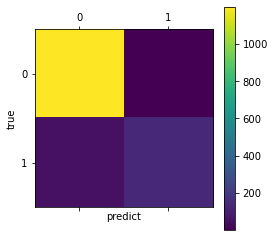

In [12]:
plt.matshow(confusion)
plt.colorbar()
plt.xlabel('predict')
plt.ylabel('true')

In [13]:
(confusion[0,0]+confusion[1,1])/confusion.sum() #准确率

0.9597989949748744

In [14]:
confusion[1,1]/(confusion[1,1]+confusion[0,1]) #精准率

0.9857142857142858

In [15]:
confusion[1,1]/(confusion[1,1]+confusion[1,0]) #召回率

0.71875

In [16]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

In [17]:
y_num=lb.fit_transform(y_train)
y_test_num=lb.transform(y_test)

In [18]:
precision=cross_val_score(estimator=logr,X=X_test,y=y_test_num,cv=5,n_jobs=-1,scoring='precision')
precision.mean()

1.0

In [19]:
recall=cross_val_score(estimator=logr,X=X_test,y=y_test_num,cv=5,n_jobs=-1,scoring='recall')
recall.mean()

0.31228070175438594

In [20]:
f1=cross_val_score(estimator=logr,X=X_test,y=y_test_num,cv=5,n_jobs=-1,scoring='f1') # 最好得分1
f1.mean()

0.47303554950092613

In [24]:
from sklearn.metrics import roc_curve,auc #受试者操作特征曲线

In [32]:
y_score=logr.predict_proba(X_test)
y_score

array([[0.79267245, 0.20732755],
       [0.96721171, 0.03278829],
       [0.97787609, 0.02212391],
       ...,
       [0.98381415, 0.01618585],
       [0.93934264, 0.06065736],
       [0.09029758, 0.90970242]])

In [37]:
fp,recall,thresholds=roc_curve(y_test_num,y_score=y_score[:,1])
auc2=auc(fp,recall)
auc2

0.985558909242298

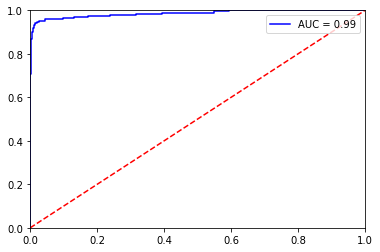

In [40]:
plt.plot(fp,recall,c='b',label='AUC = %0.2f'%auc2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='upper right')